# Get the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# LST20 dataset

### pip

In [4]:
! pip install -q datasets transformers[sentencepiece] simpletransformers

     |████████████████████████████████| 311 kB 8.4 MB/s 
     |████████████████████████████████| 3.5 MB 55.8 MB/s 
     |████████████████████████████████| 248 kB 54.7 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 134 kB 55.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.2 MB/s 
     |████████████████████████████████| 212 kB 62.8 MB/s 
     |████████████████████████████████| 6.8 MB 2.4 MB/s 
     |████████████████████████████████| 9.7 MB 24.5 MB/s 
     |████████████████████████████████| 1.2 MB 56.7 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 1.7 MB 51.5 MB/s 
     |████████████████████████████████| 596 kB 51.4 MB/s 
     |████████████████████████████████| 895 kB 50.5 MB/s 
     |████████████████████████████████| 181 kB 63.0 MB/s 
     |████████████████████████████████| 144 kB 55.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████

In [5]:
! wget https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz

--2022-02-25 03:08:11--  https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz [following]
--2022-02-25 03:08:11--  https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13551362 (13M) [application/octet-stream]
Saving to: ‘AIFORTHAI-LST20Corpus.tar.gz’

AIFORTHAI-LST20Corp 100%[===================>]  12.92M  --.-KB/s    in 0.09s   

2022-02-25 03:08:11 (150 MB/s) - ‘AIFORTHAI-LST20Corpus.tar.gz’ save

In [6]:
!tar -xf /content/drive/MyDrive/Machima/Hackathon#2_NLP/0_LST20-Dataset/AIFORTHAI-LST20Corpus.tar.gz

### LST20

In [7]:
from datasets import load_dataset
lst20 = load_dataset("lst20", data_dir="/content/LST20_Corpus")

Downloading:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Using custom data configuration default-97621787f5b60e1b


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset lst20 downloaded and prepared to /root/.cache/huggingface/datasets/lst20/default-97621787f5b60e1b/0.0.0/e1b2a921fb011578ab43ddbbf789f3c500d62cb2df8ae4ed4b60bae8e4c0d3ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
import pandas as pd
train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

In [9]:
train_df

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]"
...,...,...,...,...,...,...
63305,6,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, หาก, การ, ยื่น...","[0, 0, 2, 1, 3, 2, 3, 7, 1, 0, 12, 1, 3, 5, 1,...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63306,7,T13136.txt,"[เมื่อ, ถาม, ว่า, _, ใน, ทาง, การเมือง, _, หาก...","[4, 1, 3, 2, 4, 0, 0, 2, 3, 0, 3, 1, 0, 6, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63307,8,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, เรื่อง, กฎหมาย...","[0, 0, 2, 1, 3, 2, 0, 0, 5, 3, 1, 2, 7, 1, 1, ...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63308,9,T13136.txt,"[หาก, เป็น, การ, ขอ, ถวาย, ฎีกา, ตาม, โบราณ, ร...","[3, 1, 7, 1, 1, 0, 4, 0, 0, 2, 5, 1, 0, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, ..."


In [10]:
# See tags from https://github.com/huggingface/datasets/blob/master/datasets/lst20/lst20.py
_POS_TAGS = ["NN", "VV", "PU", "CC", "PS", "AX", "AV", "FX", "NU", "AJ", "CL", "PR", "NG", "PA", "XX", "IJ"]
_NER_TAGS = [
        "O",      # class 0
        "B_BRN",  # class 1
        "B_DES",  # class 2
        "B_DTM",  # class 3
        "B_LOC",  # class 4
        "B_MEA",  # class 5
        "B_NUM",  # class 6
        "B_ORG",  # class 7
        "B_PER",  # class 8
        "B_TRM",  # class 9
        "B_TTL",  # class 10
        "I_BRN",  # class 11
        "I_DES",  # class 12
        "I_DTM",  # class 13
        "I_LOC",  # class 14
        "I_MEA",  # class 15
        "I_NUM",  # class 16
        "I_ORG",  # class 17
        "I_PER",  # class 18
        "I_TRM",  # class 19
        "I_TTL",  # class 20
        "E_BRN",  # class 21
        "E_DES",  # class 22
        "E_DTM",  # class 23
        "E_LOC",  # class 24
        "E_MEA",  # class 25
        "E_NUM",  # class 26
        "E_ORG",  # class 27
        "E_PER",  # class 28
        "E_TRM",  # class 29
        "E_TTL",  # class 30
    ]
_CLAUSE_TAGS = ["O", "B_CLS", "I_CLS", "E_CLS"]

### Ner tag person

In [ ]:
# check if there is tag 8 >> person in a sentence
from tqdm import tqdm

index_8 = []
for i in tqdm(range(len(train_df))):
  if 8 in train_df.loc[:, 'ner_tags'][i]:
    # print(train_df.loc[:, 'ner_tags'][i])
    index_8.append(i)

100%|██████████| 63310/63310 [00:01<00:00, 38512.43it/s]


In [ ]:
df_person = train_df.loc[index_8]
df_person.reset_index(drop=True, inplace=True)
df_person

### Ner tag location

In [11]:
# check if there is tag 4,14,24 >> person in a sentence
from tqdm import tqdm

index_loc = []
for i in tqdm(range(len(train_df))):
  if (4 in train_df.loc[:, 'ner_tags'][i]) or (14 in train_df.loc[:, 'ner_tags'][i]) or (24 in train_df.loc[:, 'ner_tags'][i]):
    # print(train_df.loc[:, 'ner_tags'][i])
    index_loc.append(i)

100%|██████████| 63310/63310 [00:07<00:00, 8079.32it/s] 


In [12]:
df_location = train_df.loc[index_loc]
df_location.reset_index(drop=True, inplace=True)
df_location

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
1,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
2,5,T00126.txt,"[(, 1, _, ก.ย., ), _, พล.อ., สุรยุทธ์, _, จุลา...","[2, 8, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, ...","[0, 3, 13, 23, 0, 0, 2, 8, 18, 28, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
3,6,T00126.txt,"[กรณีที่, สหภาพ, ยุโรป, _, (, อียู, ), _, จะ, ...","[3, 0, 0, 2, 2, 0, 2, 2, 5, 1, 6, 6, 1, 7, 1, ...","[0, 7, 27, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,10,T00126.txt,"[นายก, รัฐมนตรี, เชื่อ, ว่า, การที่, ประเทศ, ไ...","[0, 0, 1, 3, 3, 0, 0, 1, 4, 0, 7, 1, 2, 0, 2, ...","[0, 0, 0, 0, 0, 4, 24, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
...,...,...,...,...,...,...
17572,22,T13133.txt,"[ผู้สื่อข่าว, รายงาน, ว่า, _, เมื่อ, ช่วง, เช้...","[0, 1, 3, 2, 4, 0, 0, 0, 9, 2, 0, 0, 1, 6, 4, ...","[0, 0, 0, 0, 0, 3, 23, 0, 0, 0, 2, 8, 0, 0, 0,...","[1, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
17573,30,T13133.txt,"[วัน, เดียว, กัน, _, พล.ต.ท., สุวัฒน์, _, จันท...","[0, 8, 11, 2, 0, 0, 2, 0, 2, 7, 1, 2, 0, 0, 2,...","[0, 0, 0, 0, 2, 8, 18, 28, 0, 0, 2, 12, 12, 7,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
17574,43,T13133.txt,"[วัน, เดียว, กัน, _, พนักงาน, สอบสวน, คดี, ลอบ...","[0, 8, 11, 2, 0, 9, 0, 6, 1, 0, 0, 2, 5, 1, 1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 8, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
17575,1,T13136.txt,"[ผู้สื่อข่าว, รายงาน, ว่า, _, วัน, นี้, _, (, ...","[0, 1, 3, 2, 0, 9, 2, 2, 8, 2, 0, 2, 2, 3, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 3, 13, 23, 0, 0, 0, 4...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"


ดึงคำที่เป็น ner ออกมา

In [13]:
a = df_location.loc[8, 'ner_tags']
index = []
for i in range(len(a)):
  if a[i] == 4 or a[i] == 14 or a[i] == 24:
    index.append(i)

words = []
b = df_location.loc[8, 'tokens']
for i in index:
  words.append(b[i])
words

['ไทย',
 'เอ็ม_จี_ประสิทธิ์ฟาร์ม',
 'บ.',
 'หนองไผ่น้อย',
 'ต.',
 'ชุมเห็ด',
 'อ.',
 'เมือง']

In [14]:
#df_location['location_word'] = 0
locations = []

for index, row in tqdm(df_location.iterrows()):
  a = row['ner_tags']

  index_lst = []
  for i in range(len(a)):
    if a[i] == 4 or a[i] == 14 or a[i] == 24:
      index_lst.append(i)

  words = []
  b = row['tokens']
  for i in index_lst:
    words.append(b[i])

  locations.append(words)
  # print(b[index])
  # df_location.loc[index, 'location_word'] = b[index]

17577it [00:01, 12555.85it/s]


In [15]:
df_location['location_word'] = locations

In [16]:
df_location

,id,fname,tokens,pos_tags,ner_tags,clause_tags,location_word
0,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ...",[ไทย]
1,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",[ไทย]
2,5,T00126.txt,"[(, 1, _, ก.ย., ), _, พล.อ., สุรยุทธ์, _, จุลา...","[2, 8, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, ...","[0, 3, 13, 23, 0, 0, 2, 8, 18, 28, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",[บ้านพิษณุโลก]
3,6,T00126.txt,"[กรณีที่, สหภาพ, ยุโรป, _, (, อียู, ), _, จะ, ...","[3, 0, 0, 2, 2, 0, 2, 2, 5, 1, 6, 6, 1, 7, 1, ...","[0, 7, 27, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",[ไทย]
4,10,T00126.txt,"[นายก, รัฐมนตรี, เชื่อ, ว่า, การที่, ประเทศ, ไ...","[0, 0, 1, 3, 3, 0, 0, 1, 4, 0, 7, 1, 2, 0, 2, ...","[0, 0, 0, 0, 0, 4, 24, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[ประเทศ, ไทย, ไทย]"
...,...,...,...,...,...,...,...
17572,22,T13133.txt,"[ผู้สื่อข่าว, รายงาน, ว่า, _, เมื่อ, ช่วง, เช้...","[0, 1, 3, 2, 4, 0, 0, 0, 9, 2, 0, 0, 1, 6, 4, ...","[0, 0, 0, 0, 0, 3, 23, 0, 0, 0, 2, 8, 0, 0, 0,...","[1, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[สำนักงาน, _, ผบ., ตร., สำนักงาน, ตำรวจ, แห่ง,..."
17573,30,T13133.txt,"[วัน, เดียว, กัน, _, พล.ต.ท., สุวัฒน์, _, จันท...","[0, 8, 11, 2, 0, 0, 2, 0, 2, 7, 1, 2, 0, 0, 2,...","[0, 0, 0, 0, 2, 8, 18, 28, 0, 0, 2, 12, 12, 7,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[ตึก, ไทยคู่ฟ้า, ทำเนียบ, รัฐบาล]"
17574,43,T13133.txt,"[วัน, เดียว, กัน, _, พนักงาน, สอบสวน, คดี, ลอบ...","[0, 8, 11, 2, 0, 9, 0, 6, 1, 0, 0, 2, 5, 1, 1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 8, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[จ., ลพบุรี]"
17575,1,T13136.txt,"[ผู้สื่อข่าว, รายงาน, ว่า, _, วัน, นี้, _, (, ...","[0, 1, 3, 2, 0, 9, 2, 2, 8, 2, 0, 2, 2, 3, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 3, 13, 23, 0, 0, 0, 4...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]","[ทำเนียบ, รัฐบาล]"


In [17]:
# df_location = df_location[['id','fname','tokens', 'location_word']].copy()
df_location.rename({"location_word":"answer"}, inplace=True, axis=1)
df_location

,id,fname,tokens,pos_tags,ner_tags,clause_tags,answer
0,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ...",[ไทย]
1,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",[ไทย]
2,5,T00126.txt,"[(, 1, _, ก.ย., ), _, พล.อ., สุรยุทธ์, _, จุลา...","[2, 8, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, ...","[0, 3, 13, 23, 0, 0, 2, 8, 18, 28, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",[บ้านพิษณุโลก]
3,6,T00126.txt,"[กรณีที่, สหภาพ, ยุโรป, _, (, อียู, ), _, จะ, ...","[3, 0, 0, 2, 2, 0, 2, 2, 5, 1, 6, 6, 1, 7, 1, ...","[0, 7, 27, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",[ไทย]
4,10,T00126.txt,"[นายก, รัฐมนตรี, เชื่อ, ว่า, การที่, ประเทศ, ไ...","[0, 0, 1, 3, 3, 0, 0, 1, 4, 0, 7, 1, 2, 0, 2, ...","[0, 0, 0, 0, 0, 4, 24, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[ประเทศ, ไทย, ไทย]"
...,...,...,...,...,...,...,...
17572,22,T13133.txt,"[ผู้สื่อข่าว, รายงาน, ว่า, _, เมื่อ, ช่วง, เช้...","[0, 1, 3, 2, 4, 0, 0, 0, 9, 2, 0, 0, 1, 6, 4, ...","[0, 0, 0, 0, 0, 3, 23, 0, 0, 0, 2, 8, 0, 0, 0,...","[1, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[สำนักงาน, _, ผบ., ตร., สำนักงาน, ตำรวจ, แห่ง,..."
17573,30,T13133.txt,"[วัน, เดียว, กัน, _, พล.ต.ท., สุวัฒน์, _, จันท...","[0, 8, 11, 2, 0, 0, 2, 0, 2, 7, 1, 2, 0, 0, 2,...","[0, 0, 0, 0, 2, 8, 18, 28, 0, 0, 2, 12, 12, 7,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[ตึก, ไทยคู่ฟ้า, ทำเนียบ, รัฐบาล]"
17574,43,T13133.txt,"[วัน, เดียว, กัน, _, พนักงาน, สอบสวน, คดี, ลอบ...","[0, 8, 11, 2, 0, 9, 0, 6, 1, 0, 0, 2, 5, 1, 1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 8, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[จ., ลพบุรี]"
17575,1,T13136.txt,"[ผู้สื่อข่าว, รายงาน, ว่า, _, วัน, นี้, _, (, ...","[0, 1, 3, 2, 0, 9, 2, 2, 8, 2, 0, 2, 2, 3, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 3, 13, 23, 0, 0, 0, 4...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]","[ทำเนียบ, รัฐบาล]"


In [18]:
df_location['text'] = df_location['tokens'].apply(lambda x:"".join(x))

In [19]:
print(df_location.loc[14, 'tokens'])

['นาย', 'สุไฮมี', 'เป็น', 'ผู้นำ', 'ระเบิด', 'ไป', 'วาง', 'ภายใน', 'ธนาคาร', 'กสิกรไทย', 'สาขา', 'ยะลา', 'เป็น', 'เหตุ', 'ให้', 'มี', 'ผู้', 'เสียชีวิต', '_', '1', '_', 'ราย', 'และ', 'บาดเจ็บ', 'จำนวน', 'มาก']


In [25]:
print(list(map(lambda x: _POS_TAGS[x], df_location["pos_tags"][14])))

['NN', 'NN', 'VV', 'NN', 'NN', 'AV', 'VV', 'PS', 'NN', 'NN', 'NN', 'NN', 'VV', 'NN', 'CC', 'VV', 'FX', 'VV', 'PU', 'NU', 'PU', 'CL', 'CC', 'VV', 'NN', 'VV']


In [21]:
df_location.loc[14, :]

id                                                             8
fname                                                 T00128.txt
tokens         [นาย, สุไฮมี, เป็น, ผู้นำ, ระเบิด, ไป, วาง, ภา...
pos_tags       [0, 0, 1, 0, 0, 6, 1, 4, 0, 0, 0, 0, 1, 0, 3, ...
ner_tags       [10, 8, 0, 0, 0, 0, 0, 0, 7, 17, 4, 24, 0, 0, ...
clause_tags    [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, ...
answer                                              [สาขา, ยะลา]
text           นายสุไฮมีเป็นผู้นำระเบิดไปวางภายในธนาคารกสิกรไ...
Name: 14, dtype: object

In [ ]:
df_location.to_csv("df_location.csv")

### get the question from rule-based

In [ ]:
# input ner_text : T00126['ner_tags'].values[0] >> [8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]
def return_ner_at(ner_text):
  index_fill_qa = []
  for i in range(len(ner_text)):
    if ner_text[i] != 0:
      class_ner = ner_text[i]
      index_fill_qa.append([i,_NER_TAGS[class_ner]])
  return index_fill_qa # ได้ [[ตำแหน่ง index, class_ner], ...]

# text : text_dataframe >> T00126
# sentence_id : sentence ids >> T00126['id'].values


def generate_qa_rule_base(text, sentence_id):
  # qa_lst
  qa_list = []

  # from return_ner_at
  for i in range(0,len(sentence_id)):
    ner_at = return_ner_at(text['ner_tags'].values[i])

    #string
    text_sentence = text['tokens'][i].copy()

    for j in ner_at: # [[0, 'B_PER'], [8, 'B_ORG']] at sentence id 0
      index = j[0]
      if (j[-1] == 'B_PER'):
        text_sentence[index] = 'ใคร'
    qa_list.append(text_sentence)

  return qa_list

In [ ]:
df_person['question'] = generate_qa_rule_base(df_person, df_person['id'].values)
df_person

,id,fname,tokens,pos_tags,ner_tags,clause_tags,question
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]","[ใคร, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ, อียู..."
1,5,T00126.txt,"[(, 1, _, ก.ย., ), _, พล.อ., สุรยุทธ์, _, จุลา...","[2, 8, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, ...","[0, 3, 13, 23, 0, 0, 2, 8, 18, 28, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[(, 1, _, ก.ย., ), _, พล.อ., ใคร, _, จุลานนท์,..."
2,7,T00126.txt,"[ซึ่ง, นาย, อภิชาต, _, สุขัคคานนท์, ประธาน, กก...","[3, 0, 0, 2, 0, 0, 0, 5, 1, 3, 0, 4, 7, 1, 1, ...","[0, 10, 8, 18, 28, 0, 7, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, ...","[ซึ่ง, นาย, ใคร, _, สุขัคคานนท์, ประธาน, กกต.,..."
3,4,T00127.txt,"[สาย, วัน, นี้, (, 1, _, ก.ย., ), _, พ.ต.อ., ส...","[0, 0, 9, 2, 8, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, ...","[0, 0, 0, 0, 3, 13, 23, 0, 0, 2, 8, 18, 28, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[สาย, วัน, นี้, (, 1, _, ก.ย., ), _, พ.ต.อ., ใ..."
4,6,T00127.txt,"[จาก, การ, ตรวจสอบ, ใน, โกดัง, ที่, อยู่, ด้าน...","[4, 7, 1, 4, 0, 3, 1, 0, 8, 0, 1, 0, 0, 3, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, ...","[จาก, การ, ตรวจสอบ, ใน, โกดัง, ที่, อยู่, ด้าน..."
...,...,...,...,...,...,...,...
28950,51,T13133.txt,"[โดย, ชุด, สืบสวน, ตรวจสอบ, การ, ใช้, โทรศัพท์...","[3, 0, 9, 1, 7, 1, 0, 1, 3, 2, 0, 0, 2, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, ...","[โดย, ชุด, สืบสวน, ตรวจสอบ, การ, ใช้, โทรศัพท์..."
28951,2,T13136.txt,"[นาย, ปณิธาน, _, วัฒนายากร, _, รอง, เลขาธิการ,...","[0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, ...","[10, 8, 18, 28, 0, 2, 12, 12, 22, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[นาย, ใคร, _, วัฒนายากร, _, รอง, เลขาธิการ, นา..."
28952,3,T13136.txt,"[กรณี, ถวาย, ฎีกา, ขอ, พระราชทาน, อภัยโทษ, ให้...","[0, 1, 0, 1, 1, 0, 5, 2, 0, 0, 2, 0, 2, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 18, 28, 0, 0, 2...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[กรณี, ถวาย, ฎีกา, ขอ, พระราชทาน, อภัยโทษ, ให้..."
28953,6,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, หาก, การ, ยื่น...","[0, 0, 2, 1, 3, 2, 3, 7, 1, 0, 12, 1, 3, 5, 1,...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[นาย, ใคร, _, กล่าว, ว่า, _, หาก, การ, ยื่น, ฎ..."


In [ ]:
df_qa = df_person.copy()
df_qa = df_qa[['id', 'fname', 'tokens', 'question']]
df_qa

,id,fname,tokens,question
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[ใคร, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ, อียู..."
1,5,T00126.txt,"[(, 1, _, ก.ย., ), _, พล.อ., สุรยุทธ์, _, จุลา...","[(, 1, _, ก.ย., ), _, พล.อ., ใคร, _, จุลานนท์,..."
2,7,T00126.txt,"[ซึ่ง, นาย, อภิชาต, _, สุขัคคานนท์, ประธาน, กก...","[ซึ่ง, นาย, ใคร, _, สุขัคคานนท์, ประธาน, กกต.,..."
3,4,T00127.txt,"[สาย, วัน, นี้, (, 1, _, ก.ย., ), _, พ.ต.อ., ส...","[สาย, วัน, นี้, (, 1, _, ก.ย., ), _, พ.ต.อ., ใ..."
4,6,T00127.txt,"[จาก, การ, ตรวจสอบ, ใน, โกดัง, ที่, อยู่, ด้าน...","[จาก, การ, ตรวจสอบ, ใน, โกดัง, ที่, อยู่, ด้าน..."
...,...,...,...,...
28950,51,T13133.txt,"[โดย, ชุด, สืบสวน, ตรวจสอบ, การ, ใช้, โทรศัพท์...","[โดย, ชุด, สืบสวน, ตรวจสอบ, การ, ใช้, โทรศัพท์..."
28951,2,T13136.txt,"[นาย, ปณิธาน, _, วัฒนายากร, _, รอง, เลขาธิการ,...","[นาย, ใคร, _, วัฒนายากร, _, รอง, เลขาธิการ, นา..."
28952,3,T13136.txt,"[กรณี, ถวาย, ฎีกา, ขอ, พระราชทาน, อภัยโทษ, ให้...","[กรณี, ถวาย, ฎีกา, ขอ, พระราชทาน, อภัยโทษ, ให้..."
28953,6,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, หาก, การ, ยื่น...","[นาย, ใคร, _, กล่าว, ว่า, _, หาก, การ, ยื่น, ฎ..."


In [ ]:
df_qa.to_csv("qa_tag_person.csv")

# Thai Q&A question

### get the data - json file

In [ ]:
import json
 
f = open('/content/drive/MyDrive/PiceFolder/ThaiQACorpus-DevelopmentDataset.json')
data = json.load(f)
f.close()

### data preprocessing >> to dataframe

In [ ]:
len(data['data'])

4000

In [ ]:
data['data'][0]

{'answer': 'ฮิกกิ้นส์',
 'answer_begin_position ': 529,
 'answer_end_position': 538,
 'article_id': 115035,
 'question': 'สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Benji ที่ออกฉายในปี พ.ศ. 2517 มีชื่อว่าอะไร',
 'question_id': 1}

In [ ]:
dic = data['data'][0]
dic.keys()

dict_keys(['question_id', 'question', 'answer', 'answer_begin_position ', 'answer_end_position', 'article_id'])

In [ ]:
article_id = []
question = []
question_id = []
answer = []
answer_begin_position  = []
answer_end_position = []

for i in data['data']:
  article_id.append(i['article_id'])
  question.append(i['question'])
  question_id.append(i['question_id'])
  answer.append(i['answer'])
  answer_begin_position.append(i['answer_begin_position ']) # มีเว้นวรรค 1 ช่อง ข้อมูลทำมาแบบนั้น
  answer_end_position.append(i['answer_end_position'])

In [ ]:
df_qa = pd.DataFrame(data=article_id, columns=['article_id'])
df_qa['question'] = question
df_qa['question_id'] = question_id
df_qa['answer'] = answer
df_qa['answer_begin_position'] = answer_begin_position
df_qa['answer_end_position'] = answer_end_position
df_qa

,article_id,question,question_id,answer,answer_begin_position,answer_end_position
0,115035,สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,1,ฮิกกิ้นส์,529,538
1,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,2,เมชตา,139,144
2,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,3,ลมสุริยะ,641,649
3,547560,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,4,ปี 1933,304,311
4,193032,ห้องทำงานรูปไข่ สร้างขึ้นในสมัยอดีตประธานาธิบด...,5,ประธานาธิบดีวิลเลียม เอช. ทัฟต์,231,262
...,...,...,...,...,...,...
3995,5114,จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,3996,นครราชสีมา,107,117
3996,5114,ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,3997,ดอกสาธร,838,845
3997,20722,เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,3998,ราบัต,469,474
3998,355975,กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,3999,2532,218,222


### check range of the articles

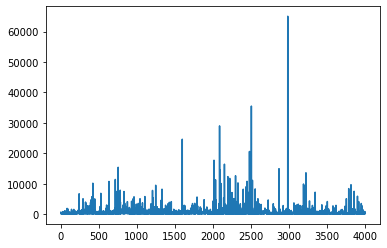

In [ ]:
df_qa['answer_begin_position'].plot()

In [ ]:
df_qa[df_qa['answer_end_position'] <= 1000]

,article_id,question,question_id,answer,answer_begin_position,answer_end_position
0,115035,สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,1,ฮิกกิ้นส์,529,538
1,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,2,เมชตา,139,144
2,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,3,ลมสุริยะ,641,649
3,547560,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,4,ปี 1933,304,311
4,193032,ห้องทำงานรูปไข่ สร้างขึ้นในสมัยอดีตประธานาธิบด...,5,ประธานาธิบดีวิลเลียม เอช. ทัฟต์,231,262
...,...,...,...,...,...,...
3995,5114,จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,3996,นครราชสีมา,107,117
3996,5114,ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,3997,ดอกสาธร,838,845
3997,20722,เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,3998,ราบัต,469,474
3998,355975,กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,3999,2532,218,222


### put the article in the df_qa

upload artcle files

In [ ]:
!unzip /content/drive/MyDrive/PiceFolder/data_qa/wiki-documents-nsc.zip

In [ ]:
os.listdir("/content/wiki-documents-nsc")

read file

In [ ]:
f = open("/content/wiki-documents-nsc/115035.txt", "r")
data = f.read()
data

'<doc id="115035" url="https://th.wikipedia.org/wiki?curid=115035" title="เบนจี้">เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji\'s Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji\'s Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax & t

remove html tag

In [ ]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [ ]:
data = cleanhtml(data)
data

"เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax & the Alien Prince (ภาพยนตร์ซีรีส์) - พ.ศ. 2530, Benji the Hunted (ภาพยนตร์) - พ.ศ. 25

put them in dataframe and map the article by its name

In [ ]:
from tqdm import tqdm

path = "/content/wiki-documents-nsc/"
article = []

for index, row in tqdm(df_qa.iterrows()):
  # map an article id with text file
  article_index = row['article_id']
  path_txt = path + "{}.txt".format(article_index)

  #read file
  text_file = open(path_txt, "r")
  data = text_file.read()

  #clean htmltag
  data = cleanhtml(data)

  #update index of begin and end of the answer after removing the html tag
  answer = df_qa.loc[index, 'answer']
  df_qa.loc[index, 'answer_begin_position'] = data.find(answer)
  df_qa.loc[index, 'answer_end_position'] = data.find(answer) + len(answer)

  article.append(data)

4000it [00:03, 1144.37it/s]


In [ ]:
article[:3]

["เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax & the Alien Prince (ภาพยนตร์ซีรีส์) - พ.ศ. 2530, Benji the Hunted (ภาพยนตร์) - พ.ศ. 2

add article to df_qa

In [ ]:
df_qa.insert(0, 'article', article)

check range of the article

In [ ]:
df_qa['range_article'] = df_qa['article'].apply(lambda x:len(x))

In [ ]:
df_qa.head()

,article,article_id,question,question_id,answer,answer_begin_position,answer_end_position,range_article
0,เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,115035,สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,1,ฮิกกิ้นส์,447,456,1081
1,ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,2,เมชตา,57,62,856
2,ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,3,ลมสุริยะ,559,567,856
3,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,547560,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,4,ปี 1933,192,199,442
4,ห้องทำงานรูปไข่ ห้องทำงานรูปไข่ (Oval Office) ...,193032,ห้องทำงานรูปไข่ สร้างขึ้นในสมัยอดีตประธานาธิบด...,5,ประธานาธิบดีวิลเลียม เอช. ทัฟต์,140,171,411


### Try to substring from the article

เช็ค 2 อย่าง:
- answer_begin_position: ถ้าน้อยกว่า 200 ให้เอาข้อความตั้งแต่เริ่มประโยค
- answer_end_position: ถ้า range_article - answer_end_position น้อยกว่า 200 ให้เอาข้อความจนจบประโยค

อีกวิธี
- ถ้า begin - 200 < 0 : เอาข้อความตั้งแต่เริ่ม
- ถ้า end + 200 > range : เอาถึงท้ายประโยค

In [ ]:
def sub_article_200(index):
  text = df_qa.loc[index, 'article']
  start = df_qa.loc[index, 'answer_begin_position'] - 200
  end = df_qa.loc[index, 'answer_end_position'] + 200
  if start < 0:
    start = 0
  if df_qa.loc[index, 'answer_end_position'] + 200 >= df_qa.loc[index,'range_article']:
    end = df_qa.loc[index,'range_article']
  text = text[start:end]
  return text

In [ ]:
df_qa['sub-article'] = 0

for index, row in tqdm(df_qa.iterrows()):
  df_qa.loc[index, 'sub-article'] = sub_article_200(index)

4000it [00:03, 1195.10it/s]


In [ ]:
df_qa

,article,article_id,question,question_id,answer,answer_begin_position,answer_end_position,range_article,sub-article
0,เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,115035,สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,1,ฮิกกิ้นส์,447,456,1081,กในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าช...
1,ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,2,เมชตา,57,62,856,ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...
2,ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,376583,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,3,ลมสุริยะ,559,567,856,หวนชั้นนอก ค่าที่ได้จากการตรวจวัดดังกล่าวทำให้...
3,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,547560,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,4,ปี 1933,192,199,442,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...
4,ห้องทำงานรูปไข่ ห้องทำงานรูปไข่ (Oval Office) ...,193032,ห้องทำงานรูปไข่ สร้างขึ้นในสมัยอดีตประธานาธิบด...,5,ประธานาธิบดีวิลเลียม เอช. ทัฟต์,140,171,411,ห้องทำงานรูปไข่ ห้องทำงานรูปไข่ (Oval Office) ...
...,...,...,...,...,...,...,...,...,...
3995,จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,5114,จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,3996,นครราชสีมา,7,17,62232,จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...
3996,จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,5114,ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,3997,ดอกสาธร,749,756,62232,าประจำจังหวัด : รูปอนุสาวรีย์ท้าวสุรนารีหน้าปร...
3997,ประเทศโมร็อกโก โมร็อกโก (; ชื่อทางการคือ ราชอา...,20722,เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,3998,ราบัต,381,386,4869,็อกโกมีเทือกเขาหินขรุขระตรงกลาง มีทะเลทรายขนาด...
3998,คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...,355975,กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,3999,2532,130,134,1909,คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...


In [ ]:
df_qa.loc[0, 'sub-article']

"กในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of "

In [ ]:
df_qa.loc[0, 'question']

'สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Benji ที่ออกฉายในปี พ.ศ. 2517 มีชื่อว่าอะไร'

In [ ]:
df_qa.to_csv("df_qa_ver_1_not_tokenize.csv")

### tokenize the article & question & answer

In [ ]:
df = df_qa.copy()
df = df[['sub-article', 'question', 'answer', 'answer_begin_position', 'answer_end_position']]
df

,sub-article,question,answer,answer_begin_position,answer_end_position
0,กในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าช...,สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,ฮิกกิ้นส์,447,456
1,ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,เมชตา,57,62
2,หวนชั้นนอก ค่าที่ได้จากการตรวจวัดดังกล่าวทำให้...,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,ลมสุริยะ,559,567
3,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,ปี 1933,192,199
4,ห้องทำงานรูปไข่ ห้องทำงานรูปไข่ (Oval Office) ...,ห้องทำงานรูปไข่ สร้างขึ้นในสมัยอดีตประธานาธิบด...,ประธานาธิบดีวิลเลียม เอช. ทัฟต์,140,171
...,...,...,...,...,...
3995,จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,นครราชสีมา,7,17
3996,าประจำจังหวัด : รูปอนุสาวรีย์ท้าวสุรนารีหน้าปร...,ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,ดอกสาธร,749,756
3997,็อกโกมีเทือกเขาหินขรุขระตรงกลาง มีทะเลทรายขนาด...,เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,ราบัต,381,386
3998,คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...,กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,2532,130,134


from pythainlp

In [ ]:
!pip -q install pythainlp

     |████████████████████████████████| 11.5 MB 5.2 MB/s 


In [ ]:
from pythainlp.tokenize import word_tokenize
text = df.loc[0,"sub-article"]
print(word_tokenize(text, engine="newmm"))

['ก', 'ใน', 'ปี', ' ', 'พ.ศ.', ' ', '2517', ' ', 'ภาพยนตร์', 'ได้รับ', 'การ', 'เสนอชื่อ', 'เข้า', 'ชิง', 'รางวัล', 'ออสการ์', ' ', 'และ', 'ได้', 'รางวัล', 'ลูกโลก', 'ทองคำ', ' ', 'สาขา', 'เพลง', 'ประกอบ', 'ยอดเยี่ยม', ' ', 'จาก', 'เพลง', ' ', 'Benji', "'", 's', ' ', 'Theme', ' ', '(', 'I', ' ', 'Feel', ' ', 'Love', ')', ' ', 'ร้อง', 'โดย', ' ', 'ชาร์ลี', ' ', 'ริ', 'ช', ' ', 'หมา', 'ที่', 'แสดง', 'เป็น', 'เบน', 'จี้', 'ตัว', 'แรก', ' ', 'ชื่อว่า', ' ', 'ฮิ', 'กกิ้นส์', ' ', '(', 'พ.ศ.', ' ', '2502', ' ', '-', ' ', 'พ.ศ.', ' ', '2518', ')', ' ', 'มีอายุ', 'ถึง', ' ', '15', ' ', 'ปี', 'แล้ว', 'ใน', 'ขณะ', 'แสดง', ' ', 'หลังจาก', 'ภาพยนตร์', 'ออก', 'ฉาย', 'ได้', 'ไม่', 'นาน', ' ', 'มัน', 'ก็', 'ตาย', 'ใน', 'ปี', ' ', 'พ.ศ.', ' ', '2518', 'เบน', 'จี้', 'ใน', 'ภาพยนตร์', 'เบน', 'จี้', 'ใน', 'ภาพยนตร์', '.', ' ', '-', ' ', 'พ.ศ.', ' ', '2517', ',', ' ', 'Benji', ' ', '(', 'ภาพยนตร์', ')', ' ', '-', ' ', 'พ.ศ.', ' ', '2520', ',', ' ', 'For', ' ', 'the', ' ', 'Love', ' ', 'of', ' ']


In [ ]:
sub_article_tokenized = []
question_tokenized = []
answer_tokenized = []

for index, row in tqdm(df_qa.iterrows()):
  text_sub_article = df.loc[index,"sub-article"]
  text_question = df.loc[index,"question"]
  text_answer = df.loc[index, 'answer']

  text_sub_article = word_tokenize(text_sub_article, engine="newmm")
  text_question = word_tokenize(text_question, engine="newmm")
  text_answer = word_tokenize(text_answer, engine="newmm")

  # ตัดคำแรกข้างหน้า เพื่อให้ data clean
  text_sub_article = text_sub_article[2:len(text_sub_article)-2]

  sub_article_tokenized.append(text_sub_article)
  question_tokenized.append(text_question)
  answer_tokenized.append(text_answer)

4000it [00:07, 542.54it/s]


In [ ]:
df['sub_article_tokenized'] = sub_article_tokenized
df['question_tokenized'] = question_tokenized
df['answer_tokenized'] = answer_tokenized

In [ ]:
df

,sub-article,question,answer,answer_begin_position,answer_end_position,sub_article_tokenized,question_tokenized,answer_tokenized
0,กในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าช...,สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,ฮิกกิ้นส์,447,456,"[ปี, , พ.ศ., , 2517, , ภาพยนตร์, ได้รับ, กา...","[สุนัข, ตัว, แรก, รับบท, เป็น, เบน, จี้, ใน, ภ...","[ฮิ, กกิ้นส์]"
1,ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,เมชตา,57,62,"[ , 1, , ลู, นา, , 1, , (, อี, -, 1, , ซีร...","[ลู, นา, , 1, , เป็น, ยานอวกาศ, ลำ, แรก, ใน,...","[เม, ช, ตา]"
2,หวนชั้นนอก ค่าที่ได้จากการตรวจวัดดังกล่าวทำให้...,ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,ลมสุริยะ,559,567,"[ , ค่าที่, ได้, จาก, การตรวจวัด, ดังกล่าว, ทำ...","[ลู, นา, , 1, , เป็น, ยานอวกาศ, ลำ, แรก, ใน,...","[ลม, สุริยะ]"
3,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,ปี 1933,192,199,"[แถลงข่าว, และ, โฆษณาชวนเชื่อ, , กระทรวง, โฆษ...","[กระทรวง, โฆษณา, แถลงข่าว, และ, โฆษณาชวนเชื่อ,...","[ปี, , 1933]"
4,ห้องทำงานรูปไข่ ห้องทำงานรูปไข่ (Oval Office) ...,ห้องทำงานรูปไข่ สร้างขึ้นในสมัยอดีตประธานาธิบด...,ประธานาธิบดีวิลเลียม เอช. ทัฟต์,140,171,"[ , ห้องทำงาน, รูปไข่, , (, Oval, , Office, ...","[ห้องทำงาน, รูปไข่, , สร้าง, ขึ้น, ใน, สมัย, ...","[ประธานาธิบดี, วิลเลียม, , เอช, ., , ทัฟต์]"
...,...,...,...,...,...,...,...,...
3995,จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,นครราชสีมา,7,17,"[ , นครราชสีมา, , หรือ, รู้จัก, ใน, ชื่อ, , ...","[จังหวัด, ใด, มี, พื้นที่, มาก, ที่สุด, ในประเ...",[นครราชสีมา]
3996,าประจำจังหวัด : รูปอนุสาวรีย์ท้าวสุรนารีหน้าปร...,ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,ดอกสาธร,749,756,"[ , :, , รูป, อนุสาวรีย์, ท้าว, สุรนารี, หน้า...","[ดอกไม้, ประจำจังหวัด, นครราชสีมา, ในประเทศ, ไ...","[ดอก, สาธร]"
3997,็อกโกมีเทือกเขาหินขรุขระตรงกลาง มีทะเลทรายขนาด...,เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,ราบัต,381,386,"[มี, เทือกเขา, หิน, ขรุขระ, ตรงกลาง, , มี, ทะ...","[เมืองหลวง, ของ, ประเทศ, โมร็อกโก, มี, ชื่อว่า...","[รา, บัต]"
3998,คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...,กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,2532,130,134,"[เพาเวอร์, , กลุ่ม, บริษัท, , คิง, , เพาเวอ...","[กลุ่ม, บริษัท, , คิง, , เพาเวอร์, , เป็น, ...",[2532]


In [ ]:
df.to_csv("thaiQA_dataset.csv")

<hr></hr>

# Generate Q&A by translating thai to eng and put it in the model

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
import pandas as pd
from googletrans import Translator
#translator
translator = Translator(service_urls=['translate.googleapis.com'])

In [ ]:
#Create dataframe
df = pd.DataFrame({'Thai':['หมาน่ารัก', 'แมว']})
df['English'] = df['Thai'].map(lambda x: translator.translate(x, src = 'th', dest = 'en').text)
df

,Thai,English
0,หมาน่ารัก,cute dog
1,แมว,cat


### apply to df_location

In [ ]:
df_location = pd.read_csv("/content/df_location.csv")
df_location.drop("Unnamed: 0", axis=1, inplace=True)
df_location.head()

,id,fname,tokens,answer,text
0,2,T00126.txt,"['นายก', 'ฯ', '_', 'ย้ำ', 'ไม่', 'ลงนาม', 'ใน'...",['ไทย'],นายกฯ_ย้ำไม่ลงนามใน_MOU_ร่วมกับอียูกรณีที่จะเข...
1,3,T00126.txt,"['ยัน', 'ไทย', 'ไม่', 'ได้', 'ล้มเหลว', 'ถึง',...",['ไทย'],ยันไทยไม่ได้ล้มเหลวถึงขั้นนั้นเชื่อการปฏิเสธเร...
2,5,T00126.txt,"['(', '1', '_', 'ก.ย.', ')', '_', 'พล.อ.', 'สุ...",['บ้านพิษณุโลก'],(1_ก.ย.)_พล.อ.สุรยุทธ์_จุลานนท์_กล่าวรายการเปิ...
3,6,T00126.txt,"['กรณีที่', 'สหภาพ', 'ยุโรป', '_', '(', 'อียู'...",['ไทย'],กรณีที่สหภาพยุโรป_(อียู)_จะขอเข้ามาสังเกตการณ์...
4,10,T00126.txt,"['นายก', 'รัฐมนตรี', 'เชื่อ', 'ว่า', 'การที่',...","['ประเทศ', 'ไทย', 'ไทย']",นายกรัฐมนตรีเชื่อว่าการที่ประเทศไทยยินยอมในเรื...


In [ ]:
df = df_location[0:2000].copy()

In [ ]:
df['text'] = df['text'].apply(lambda x:x.replace("_", " "))
df.head()

,id,fname,tokens,answer,text
0,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...",[ไทย],นายกฯ ย้ำไม่ลงนามใน MOU ร่วมกับอียูกรณีที่จะเข...
1,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...",[ไทย],ยันไทยไม่ได้ล้มเหลวถึงขั้นนั้นเชื่อการปฏิเสธเร...
2,5,T00126.txt,"[(, 1, _, ก.ย., ), _, พล.อ., สุรยุทธ์, _, จุลา...",[บ้านพิษณุโลก],(1 ก.ย.) พล.อ.สุรยุทธ์ จุลานนท์ กล่าวรายการเปิ...
3,6,T00126.txt,"[กรณีที่, สหภาพ, ยุโรป, _, (, อียู, ), _, จะ, ...",[ไทย],กรณีที่สหภาพยุโรป (อียู) จะขอเข้ามาสังเกตการณ์...
4,10,T00126.txt,"[นายก, รัฐมนตรี, เชื่อ, ว่า, การที่, ประเทศ, ไ...","[ประเทศ, ไทย, ไทย]",นายกรัฐมนตรีเชื่อว่าการที่ประเทศไทยยินยอมในเรื...


In [ ]:
df_location['text_en'] = df['text'].map(lambda x: translator.translate(x, src = 'th', dest = 'en').text)

# Create NER tags vocabulary

ต้องการดึงศัพท์ ner ออกมาทุกคำ จาก .txt file แต่ละ file 

In [ ]:
len(train_df['fname'].unique()) # มี .txt file ทั้งหมด 3794 file

3794

In [ ]:
# See tags from https://github.com/huggingface/datasets/blob/master/datasets/lst20/lst20.py
_POS_TAGS = ["NN", "VV", "PU", "CC", "PS", "AX", "AV", "FX", "NU", "AJ", "CL", "PR", "NG", "PA", "XX", "IJ"]
_NER_TAGS = [
        "O",      # class 0
        "B_BRN",  # class 1
        "B_DES",  # class 2
        "B_DTM",  # class 3
        "B_LOC",  # class 4
        "B_MEA",  # class 5
        "B_NUM",  # class 6
        "B_ORG",  # class 7
        "B_PER",  # class 8
        "B_TRM",  # class 9
        "B_TTL",  # class 10
        "I_BRN",  # class 11
        "I_DES",  # class 12
        "I_DTM",  # class 13
        "I_LOC",  # class 14
        "I_MEA",  # class 15
        "I_NUM",  # class 16
        "I_ORG",  # class 17
        "I_PER",  # class 18
        "I_TRM",  # class 19
        "I_TTL",  # class 20
        "E_BRN",  # class 21
        "E_DES",  # class 22
        "E_DTM",  # class 23
        "E_LOC",  # class 24
        "E_MEA",  # class 25
        "E_NUM",  # class 26
        "E_ORG",  # class 27
        "E_PER",  # class 28
        "E_TRM",  # class 29
        "E_TTL",  # class 30
    ]
_CLAUSE_TAGS = ["O", "B_CLS", "I_CLS", "E_CLS"]

In [ ]:
text_files = train_df['fname'].unique()

In [ ]:
O = []      # class 0
B_BRN = []  # class 1
B_DES = []  # class 2
B_DTM = []  # class 3
B_LOC = []  # class 4
B_MEA = []  # class 5
B_NUM = []  # class 6
B_ORG = []  # class 7
B_PER = []  # class 8
B_TRM = []  # class 9
B_TTL = []  # class 10
I_BRN = []  # class 11
I_DES = []  # class 12
I_DTM = []  # class 13
I_LOC = []  # class 14
I_MEA = []  # class 15
I_NUM = []  # class 16
I_ORG = []  # class 17
I_PER = []  # class 18
I_TRM = []  # class 19
I_TTL = []  # class 20
E_BRN = []  # class 21
E_DES = []  # class 22
E_DTM = []  # class 23
E_LOC = []  # class 24
E_MEA = []  # class 25
E_NUM = []  # class 26
E_ORG = []  # class 27
E_PER = []  # class 28
E_TRM = []  # class 29
E_TTL = []  # class 30

Test on text - T00126.txt

In [ ]:
df = train_df[train_df['fname'] == text_files[0]]

In [ ]:
df.head()

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]"


In [ ]:
for index, row in df.itterows():
  

[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]

<hr></hr>

In [ ]:
train_df[train_df['fname'] == 'T00126.txt']

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]"
5,5,T00126.txt,"[(, 1, _, ก.ย., ), _, พล.อ., สุรยุทธ์, _, จุลา...","[2, 8, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, ...","[0, 3, 13, 23, 0, 0, 2, 8, 18, 28, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
6,6,T00126.txt,"[กรณีที่, สหภาพ, ยุโรป, _, (, อียู, ), _, จะ, ...","[3, 0, 0, 2, 2, 0, 2, 2, 5, 1, 6, 6, 1, 7, 1, ...","[0, 7, 27, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
7,7,T00126.txt,"[ซึ่ง, นาย, อภิชาต, _, สุขัคคานนท์, ประธาน, กก...","[3, 0, 0, 2, 0, 0, 0, 5, 1, 3, 0, 4, 7, 1, 1, ...","[0, 10, 8, 18, 28, 0, 7, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, ..."
8,8,T00126.txt,"[ส่วน, อีก, ลักษณะ, หนึ่ง, ที่, ทาง, อียู, เสน...","[3, 9, 0, 9, 3, 0, 0, 1, 6, 9, 1, 0, 3, 1, 6, ...","[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
9,9,T00126.txt,"[เรา, ไม่, ได้, เป็น, ประเทศ, ที่, ถือ, ว่า, ม...","[11, 12, 5, 1, 0, 3, 1, 3, 1, 7, 1, 4, 0, 7, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, ..."
